In [2]:
# Data wrangling
library(tidyverse)

# install.packages('imager')

# Image manipulation
library(imager)

# Deep learning
library(keras)

# Model Evaluation
library(caret)

options(scipen = 999)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [3]:
folder_list <- list.files("/home/students/akhijose/CNN/traindata/")

folder_list

[1] "high"       "invalid"    "low"        "lowplus"    "medium"    
[6] "mediumplus" "nodata"

In [4]:
folder_path <- paste0("/home/students/akhijose/CNN/traindata/", folder_list, "/")

folder_path 

[1] "/home/students/akhijose/CNN/traindata/high/"      
[2] "/home/students/akhijose/CNN/traindata/invalid/"   
[3] "/home/students/akhijose/CNN/traindata/low/"       
[4] "/home/students/akhijose/CNN/traindata/lowplus/"   
[5] "/home/students/akhijose/CNN/traindata/medium/"    
[6] "/home/students/akhijose/CNN/traindata/mediumplus/"
[7] "/home/students/akhijose/CNN/traindata/nodata/"

In [5]:
# Get file name
file_name <- map(folder_path, 
                 function(x) paste0(x, list.files(x))
                 ) %>% 
  unlist()

# first 6 file name
head(file_name)

[1] "/home/students/akhijose/CNN/traindata/high/high_001.png" 
[2] "/home/students/akhijose/CNN/traindata/high/high_0011.png"
[3] "/home/students/akhijose/CNN/traindata/high/high_002.png" 
[4] "/home/students/akhijose/CNN/traindata/high/high_003.png" 
[5] "/home/students/akhijose/CNN/traindata/high/high_004.png" 
[6] "/home/students/akhijose/CNN/traindata/high/high_005.png"

In [6]:
# last 6 file name
tail(file_name)

[1] "/home/students/akhijose/CNN/traindata/medium/medium_004.png"         
[2] "/home/students/akhijose/CNN/traindata/mediumplus/mediumplus_001.png" 
[3] "/home/students/akhijose/CNN/traindata/mediumplus/mediumplus_0011.png"
[4] "/home/students/akhijose/CNN/traindata/nodata/nodata_001.png"         
[5] "/home/students/akhijose/CNN/traindata/nodata/nodata_0011.png"        
[6] "/home/students/akhijose/CNN/traindata/nodata/nodata_002.png"

In [7]:
length(file_name)

[1] 37

[[1]]
Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4 

[[2]]
Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4 

[[3]]
Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4 

[[4]]
Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4 

[[5]]
Image. Width: 1428 pix Height: 803 pix Depth: 1 Colour channels: 4 

[[6]]
Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4

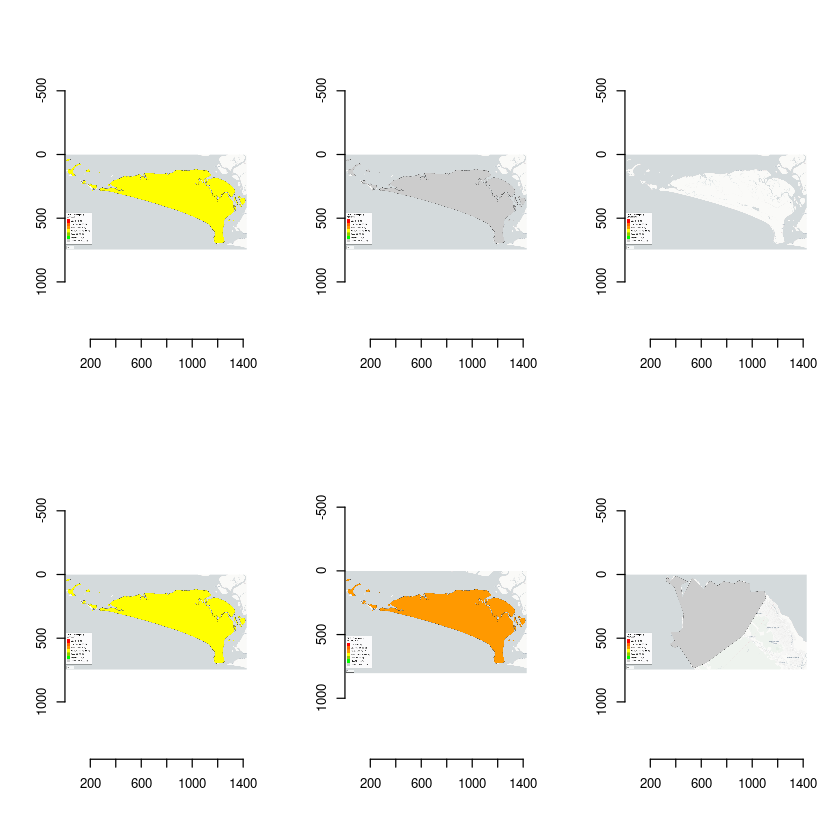

In [8]:
# Randomly select image
set.seed(99)
sample_image <- sample(file_name, 6)

# Load image into R
img <- map(sample_image, load.image)

# Plot image
par(mfrow = c(2, 3)) # Create 2 x 3 image grid
map(img, plot) 

In [9]:
# Full Image Description
img <- load.image(file_name[1])
img

Image. Width: 1428 pix Height: 746 pix Depth: 1 Colour channels: 4

In [10]:
# Image Dimension
dim(img)

[1] 1428  746    1    4

In [12]:
# Function for acquiring width and height of an image
get_dim <- function(x){
  img <- load.image(x) 
  
  df_img <- data.frame(height = height(img),
                       width = width(img),
                       filename = x
                       )
  
  return(df_img)
}

get_dim(file_name[1])

height,width,filename
<int>,<int>,<fct>
746,1428,/home/students/akhijose/CNN/traindata/high/high_001.png


In [13]:
# Randomly get 1000 sample images
set.seed(123)
sample_file <- sample(file_name, 37)

# Run the get_dim() function for each image
file_dim <- map_df(sample_file, get_dim)

head(file_dim, 29)

,height,width,filename
,<int>,<int>,<fct>
1,746,1428,/home/students/akhijose/CNN/traindata/medium/medium_003.png
2,746,1428,/home/students/akhijose/CNN/traindata/invalid/invalid_005.png
3,746,1428,/home/students/akhijose/CNN/traindata/invalid/invalid_004.png
4,746,1428,/home/students/akhijose/CNN/traindata/high/high_002.png
5,746,1428,/home/students/akhijose/CNN/traindata/nodata/nodata_001.png
6,746,1428,/home/students/akhijose/CNN/traindata/invalid/invalid_012.png
7,803,1428,/home/students/akhijose/CNN/traindata/low/low_0011.png
8,746,1428,/home/students/akhijose/CNN/traindata/lowplus/lowplus_001.png
9,746,1428,/home/students/akhijose/CNN/traindata/lowplus/lowplus_0011.png


In [14]:
summary(file_dim)

     height          width     
 Min.   :746.0   Min.   :1428  
 1st Qu.:746.0   1st Qu.:1428  
 Median :746.0   Median :1428  
 Mean   :753.7   Mean   :1428  
 3rd Qu.:746.0   3rd Qu.:1428  
 Max.   :803.0   Max.   :1428  
                               
                                                          filename 
 /home/students/akhijose/CNN/traindata/medium/medium_003.png  : 1  
 /home/students/akhijose/CNN/traindata/invalid/invalid_005.png: 1  
 /home/students/akhijose/CNN/traindata/invalid/invalid_004.png: 1  
 /home/students/akhijose/CNN/traindata/high/high_002.png      : 1  
 /home/students/akhijose/CNN/traindata/nodata/nodata_001.png  : 1  
 /home/students/akhijose/CNN/traindata/invalid/invalid_012.png: 1  
 (Other)                                                      :31  

# Data Augmentation

In [16]:
# Desired height and width of images
target_size <- c(200, 200)

# Batch size for training the model
batch_size <- 5

In [25]:
# Image Generator
train_data_gen <- image_data_generator(rescale = 1/255, # Scaling pixel value
                                       horizontal_flip = T, # Flip image horizontally
                                       vertical_flip = T, # Flip image vertically 
                                       rotation_range = 45, # Rotate image from 0 to 45 degrees
                                       zoom_range = 0.25, # Zoom in or zoom out range
                                       validation_split = 0.20 # 20% data as validation data
                                       ) 

In [26]:
# Training Dataset
train_image_array_gen <- flow_images_from_directory(directory = "/home/students/akhijose/CNN/traindata/", # Folder of the data
                                                    target_size = target_size, # target of the image dimension (200 x 200)  
                                                    color_mode = "rgb", # use RGB color
                                                    batch_size = batch_size , 
                                                    seed = 123,  # set random seed
                                                    subset = "training", # declare that this is for training data
                                                    generator = train_data_gen
                                                    )

# Validation Dataset
val_image_array_gen <- flow_images_from_directory(directory = "/home/students/akhijose/CNN/traindata/",
                                                  target_size = target_size, 
                                                  color_mode = "rgb", 
                                                  batch_size = batch_size ,
                                                  seed = 123,
                                                  subset = "validation", # declare that this is the validation data
                                                  generator = train_data_gen
                                                  ) 

In [27]:
# Number of training samples
train_samples <- train_image_array_gen$n

# Number of validation samples
valid_samples <- val_image_array_gen$n

# Number of target classes/categories
output_n <- n_distinct(train_image_array_gen$classes)
output_n

# Get the class proportion
table("\nFrequency" = factor(train_image_array_gen$classes)
      ) %>% 
  prop.table() 

[1] 7


Frequency
      1       2       3       4       5       6       7 
0.21875 0.37500 0.06250 0.06250 0.12500 0.06250 0.09375 

# Convolutional Neural Network (CNN)

In [28]:
c(target_size, 3) 

[1] 200 200   3

In [29]:
conv_base <- application_inception_resnet_v2(
  weights = "imagenet",
  include_top = FALSE,
  input_shape = c(200, 200, 3)
)

In [30]:
# Set Initial Random Weight
tensorflow::tf$random$set_seed(123)

model <- keras_model_sequential(name = "simple_model") %>% 

  conv_base %>% 
  
  # Convolution Layer
  layer_conv_2d(filters = 16,
                kernel_size = c(3,3),
                padding = "same",
                activation = "relu",
                input_shape = c(target_size, 3) 
                ) %>% 

  # Max Pooling Layer
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  
  # Flattening Layer
  layer_flatten() %>% 
  
  # Dense Layer
  layer_dense(units = 16,
              activation = "relu") %>% 
  
  # Output Layer
  layer_dense(units = 8,
              activation = "softmax",
              name = "Output")
  #Don't train the base,
  freeze_weights(conv_base)
  set.seed(123) 
model 

Model
Model: "simple_model"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 inception_resnet_v2 (Functional)   (None, 4, 4, 1536)              54336736    
                                                                                
 conv2d_407 (Conv2D)                (None, 4, 4, 16)                221200      
                                                                                
 max_pooling2d_9 (MaxPooling2D)     (None, 2, 2, 16)                0           
                                                                                
 flatten_1 (Flatten)                (None, 64)                      0           
                                                                                
 dense_1 (Dense)                    (None, 16)                      1040        
                                                                                


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”
`geom_smooth()` using formula 'y ~ x'



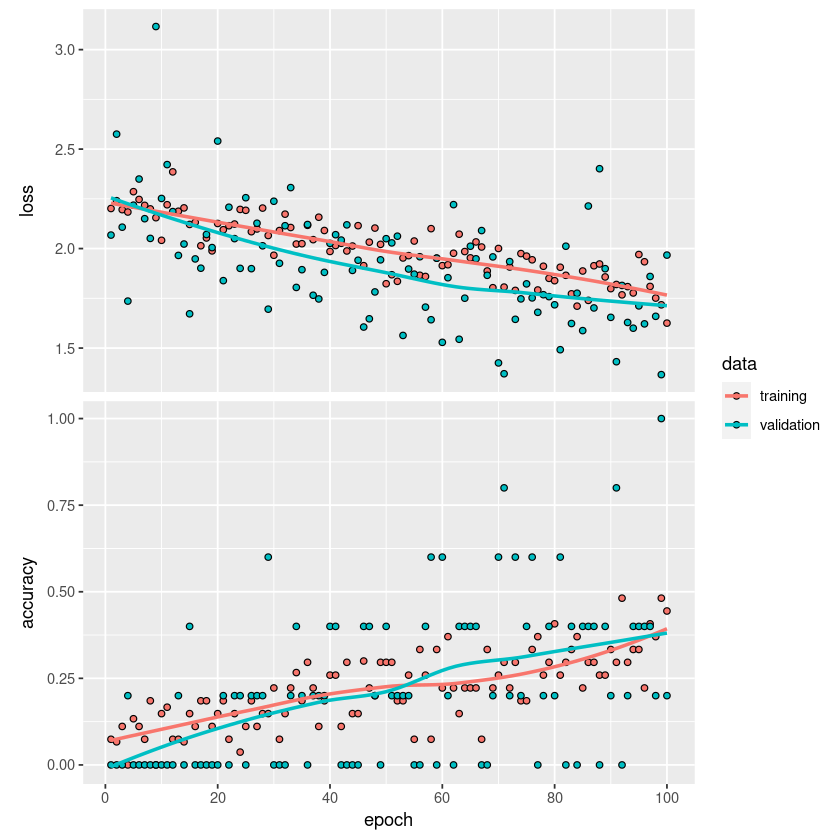

In [42]:
model %>% 
  compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer_adam(lr = 1e-6),
    metrics = c("accuracy")
  )

# Fit data into model
history <- model %>% 
  fit(
  # training data
  train_image_array_gen,

  # training epochs
  steps_per_epoch = as.integer(train_samples / batch_size), 
  epochs = 100, 
  
  # validation data
  validation_data = val_image_array_gen,
  validation_steps = as.integer(valid_samples / batch_size)
)

plot(history) 

In [43]:
# Set Initial Random Weight
tensorflow::tf$random$set_seed(123)

model <- keras_model_sequential(name = "simple_model") %>% 

  
  # Convolution Layer
  layer_conv_2d(filters = 16,
                kernel_size = c(3,3),
                padding = "same",
                activation = "relu",
                input_shape = c(target_size, 3) 
                ) %>% 

  # Max Pooling Layer
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  
  # Flattening Layer
  layer_flatten() %>% 
  
  # Dense Layer
  layer_dense(units = 16,
              activation = "relu") %>% 
  
  # Output Layer
  layer_dense(units = 8,
              activation = "softmax",
              name = "Output")
  set.seed(123) 

model 

Model
Model: "simple_model"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_408 (Conv2D)                (None, 200, 200, 16)            448         
                                                                                
 max_pooling2d_10 (MaxPooling2D)    (None, 100, 100, 16)            0           
                                                                                
 flatten_2 (Flatten)                (None, 160000)                  0           
                                                                                
 dense_2 (Dense)                    (None, 16)                      2560016     
                                                                                
 Output (Dense)                     (None, 8)                       136         
                                                                                


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”
`geom_smooth()` using formula 'y ~ x'



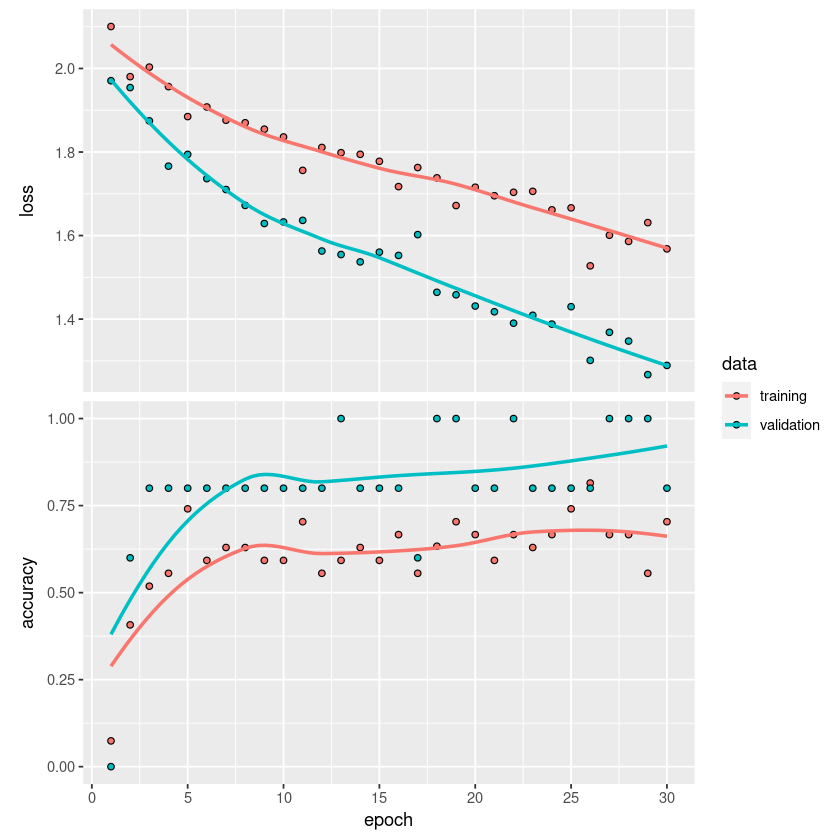

In [44]:
model %>% 
  compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer_adam(lr = 1e-6),
    metrics = c("accuracy")
  )

# Fit data into model
history <- model %>% 
  fit(
  # training data
  train_image_array_gen,

  # training epochs
  steps_per_epoch = as.integer(train_samples / batch_size), 
  epochs = 30, 
  
  # validation data
  validation_data = val_image_array_gen,
  validation_steps = as.integer(valid_samples / batch_size)
)

plot(history) 

In [73]:
val_image_array_gen$filenames

[1] "high/high_001.png"        "invalid/invalid_001.png" 
[3] "invalid/invalid_0011.png" "invalid/invalid_002.png" 
[5] "medium/medium_001.png"

In [74]:
val_data <- data.frame(file_name = paste0("/home/students/akhijose/CNN/traindata/", val_image_array_gen$filenames)) %>% 
  mutate(class = str_extract(file_name, 'high|invalid|low|lowplus|medium|mediumplus|nodata'))

head(val_data, 8) 

,file_name,class
,<fct>,<chr>
1,/home/students/akhijose/CNN/traindata/high/high_001.png,high
2,/home/students/akhijose/CNN/traindata/invalid/invalid_001.png,invalid
3,/home/students/akhijose/CNN/traindata/invalid/invalid_0011.png,invalid
4,/home/students/akhijose/CNN/traindata/invalid/invalid_002.png,invalid
5,/home/students/akhijose/CNN/traindata/medium/medium_001.png,medium


In [75]:
val_data$file_name <- as.character(val_data$file_name)

In [76]:
# Function to convert image to array
image_prep <- function(x) {
  arrays <- lapply(x, function(path) {
    img <- image_load(path, target_size = target_size, 
                      grayscale = F # Set FALSE if image is RGB
                      )
    
    x <- image_to_array(img)
    x <- array_reshape(x, c(1, dim(x)))
    x <- x/255 # rescale image pixel
  })
  do.call(abind::abind, c(arrays, list(along = 1)))
} 


In [77]:
test_x <- image_prep(val_data$file_name)

# Check dimension of testing data set
dim(test_x) 

[1]   5 200 200   3

In [78]:
pred_test <- model %>% predict(test_x) %>% k_argmax() 

In [79]:
pred_test

tf.Tensor([1 2 2 2 5], shape=(5,), dtype=int64)

In [80]:
pred_test_list = c(1,2,2,2,5)

In [81]:
# Convert encoding to label
decode <- function(x){
  case_when(x == 1 ~ "high",
            x == 2 ~ "invalid",
            x == 3 ~ "low",
            x == 4 ~ "lowplus",
            x == 5 ~ "medium",
            x == 6 ~ "mediumplus",
            x == 7 ~ "nodata"
            )
}

pred_test_list <- sapply(pred_test_list, decode) 

head(pred_test_list) 

[1] "high"    "invalid" "invalid" "invalid" "medium"

In [82]:
confusionMatrix(as.factor(pred_test_list), 
                as.factor(val_data$class)
                ) 

Confusion Matrix and Statistics

          Reference
Prediction high invalid medium
   high       1       0      0
   invalid    0       3      0
   medium     0       0      1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.4782, 1)
    No Information Rate : 0.6        
    P-Value [Acc > NIR] : 0.07776    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: high Class: invalid Class: medium
Sensitivity                  1.0            1.0           1.0
Specificity                  1.0            1.0           1.0
Pos Pred Value               1.0            1.0           1.0
Neg Pred Value               1.0            1.0           1.0
Prevalence                   0.2            0.6           0.2
Detection Rate               0.2            0.6           0.2
Dete

# Model on Testing Data

In [95]:
df_test  <- read.csv("CNNtest.csv")

df_test$filename <- as.character(df_test$filename)
df_test$class <- as.character(df_test$class)

head(df_test, 10)

,class,filename
,<chr>,<chr>
1,high,/home/students/akhijose/CNN/testdata/high/high_001.png
2,invalid,/home/students/akhijose/CNN/testdata/invalid/invalid_001.png
3,invalid,/home/students/akhijose/CNN/testdata/invalid/invalid_002.png
4,invalid,/home/students/akhijose/CNN/testdata/invalid/invalid_003.png
5,lowplus,/home/students/akhijose/CNN/testdata/lowplus/lowplus_001.png
6,medium,/home/students/akhijose/CNN/testdata/medium/medium_001.png
7,nodata,/home/students/akhijose/CNN/testdata/nodata/nodata_001.png


In [96]:
my_test_x <- image_prep(df_test$filename)

# Check dimension of testing data set
dim(my_test_x) 

[1]   7 200 200   3

In [97]:
my_pred_test <- model %>% predict(my_test_x) %>% k_argmax()

head(my_pred_test, 10) 

tf.Tensor([1 2 2 2 5 5 2], shape=(7,), dtype=int64)

In [98]:
my_pred_test_list = c(1,2,2,2,5,5,2)

In [99]:
# Convert encoding to label
decode <- function(x){
  case_when(x == 1 ~ "high",
            x == 2 ~ "invalid",
            x == 3 ~ "low",
            x == 4 ~ "lowplus",
            x == 5 ~ "medium",
            x == 6 ~ "mediumplus",
            x == 7 ~ "nodata"
            )
}

my_pred_test_list <- sapply(my_pred_test_list, decode) 

head(my_pred_test_list, 10) 

[1] "high"    "invalid" "invalid" "invalid" "medium"  "medium"  "invalid"

In [100]:
confusionMatrix(as.factor(my_pred_test_list), 
                as.factor(df_test$class)
                )

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(as.factor(my_pred_test_list), as.factor(df_test$class)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction high invalid lowplus medium nodata
   high       1       0       0      0      0
   invalid    0       3       0      0      1
   lowplus    0       0       0      0      0
   medium     0       0       1      1      0
   nodata     0       0       0      0      0

Overall Statistics
                                          
               Accuracy : 0.7143          
                 95% CI : (0.2904, 0.9633)
    No Information Rate : 0.4286          
    P-Value [Acc > NIR] : 0.1266          
                                          
                  Kappa : 0.5882          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: high Class: invalid Class: lowplus Class: medium
Sensitivity               1.0000         1.0000         0.0000        1.0000
Specificity               1.0000         0.7500         1.0000        0.8333
Pos Pred V

# Model on Precition

In [101]:
df_predict  <- read.csv("CNNpredict.csv")

df_predict$filename <- as.character(df_predict$filename)
df_predict$class <- as.character(df_predict$class)

head(df_predict, 2)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'CNNpredict.csv'”


,class,filename
,<chr>,<chr>
1,high,/home/students/akhijose/CNN/predict/map-tnhzc8.png
2,low,/home/students/akhijose/CNN/predict/map-tnhzc9.png


In [102]:
my_predict_x <- image_prep(df_predict$filename)

# Check dimension of testing data set
dim(my_predict_x) 

[1]   2 200 200   3

In [103]:
my_pred_predict <- model %>% predict(my_predict_x) %>% k_argmax()

head(my_pred_predict, 2) 

tf.Tensor([1 5], shape=(2,), dtype=int64)

In [116]:
my_pred_predict_list = c(1,5)

In [117]:
# Convert encoding to label
decode <- function(x){
  case_when(x == 1 ~ "high",
            x == 2 ~ "invalid",
            x == 3 ~ "low",
            x == 4 ~ "lowplus",
            x == 5 ~ "medium",
            x == 6 ~ "mediumplus",
            x == 7 ~ "nodata"
            )
}

my_pred_predict_list <- sapply(my_pred_predict_list, decode) 

head(my_pred_predict_list) 

[1] "high"   "medium"

In [114]:
confusionMatrix(as.factor(my_pred_predict_list), 
                as.factor(df_predict$class)
                ) 

ERROR: Error in confusionMatrix.default(as.factor(my_pred_predict_list), as.factor(df_predict$class)): The data must contain some levels that overlap the reference.
